<a href="https://colab.research.google.com/github/Ali-Mayya/DataAnalysis_FitnessCenter_RegistrationData/blob/main/Predcition_client_cancelation_from_Fitness_center_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
train_data = pd.read_csv("/content/gym_data.csv")
train_data=train_data.drop(['Unnamed: 12'],axis=1)
print(train_data.columns)
train_data.dropna()
train_data.describe().T


Index(['Row', 'Registration', 'Zipcode', 'Age', 'Partner_company',
       'Friend_promo', 'Contract_period', 'Lifetime',
       'Class_registration_weekly', 'Avg_additional_charges_total',
       'Cancellation_freq', 'Exited'],
      dtype='object')


count          mean            std        min  \
Row                           8100.0  1.405050e+04    2338.412923    10001.0   
Registration                  8100.0  2.499954e+06  289720.898309  2000159.0   
Zipcode                       8100.0  4.226915e+04   13561.944853    29941.0   
Age                           8100.0  3.878840e+01      11.071217       16.0   
Partner_company               8100.0  5.076543e-01       0.499972        0.0   
Friend_promo                  8100.0  4.928395e-01       0.499980        0.0   
Contract_period               8100.0  6.902716e+00       4.868075        1.0   
Lifetime                      8100.0  4.583086e+00       2.702545        1.0   
Class_registration_weekly     8100.0  1.540884e+00       0.802345        0.0   
Avg_additional_charges_total  8100.0  1.778947e+02      58.866795        7.6   
Cancellation_freq             8100.0  1.339099e-01       0.138021        0.0   
Exited                        8100.0  2.448148e-01       0.430004        0.0   

                                     25%         50%         75%         max  
Row                             12025.75    14050.50    16075.25    18100.00  
Registration                  2246722.00  2499495.50  2752443.25  2999894.00  
Zipcode                         29941.00    29941.00    57328.00    65232.00  
Age                                31.00       37.00       44.00       92.00  
Partner_company                     0.00        1.00        1.00        1.00  
Friend_promo                        0.00        0.00        1.00        1.00  
Contract_period                     1.00        6.00       12.00       12.00  
Lifetime                            3.00        4.00        6.00       23.00  
Class_registration_weekly           0.95        1.50        2.08        4.65  
Avg_additional_charges_total      137.28      187.22      223.00      317.20  
Cancellation_freq                   0.02        0.10        0.20        0.86  
Exited                              0.00        0.00        0.00        1.00

 # Split DataFramne
* into X for  numerical features 
* y for labeling the target or as Categorical features

In [74]:
# from pandas.core.groupby.groupby import Categorical
cols = list(train_data.columns.values)

num_feat=[]
catg_feat=[]

for i in cols:
  if len(train_data[i].unique()) > 2:
      num_feat.append(i)
  else:
      catg_feat.append(i)
      print(i, train_data[i].unique())

print(num_feat, "\n", catg_feat)
l=catg_feat.copy()
l.remove('Exited')
# print(l,catg_feat)




Partner_company [0 1]
Friend_promo [1 0]
Exited [0 1]
['Row', 'Registration', 'Zipcode', 'Age', 'Contract_period', 'Lifetime', 'Class_registration_weekly', 'Avg_additional_charges_total', 'Cancellation_freq'] 
 ['Partner_company', 'Friend_promo', 'Exited']


(8100, 9) (8100,)
Int64Index([0, 1], dtype='int64') 0    6117
1    1983
Name: Exited, dtype: int64


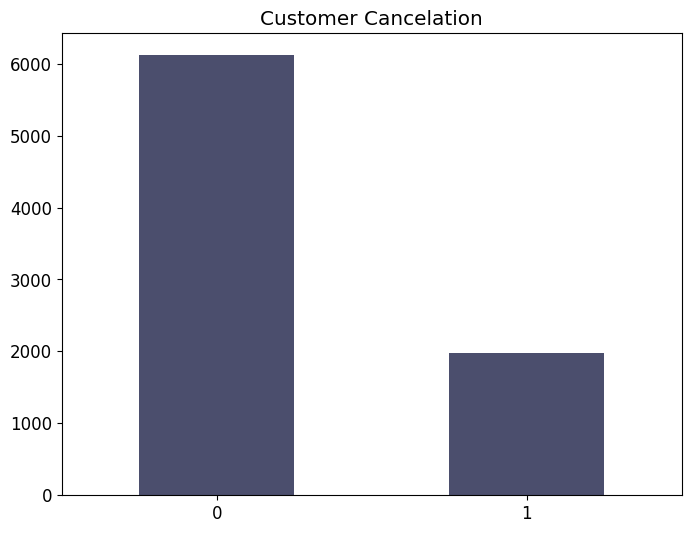

0
1
(8100, 9) (8100,)


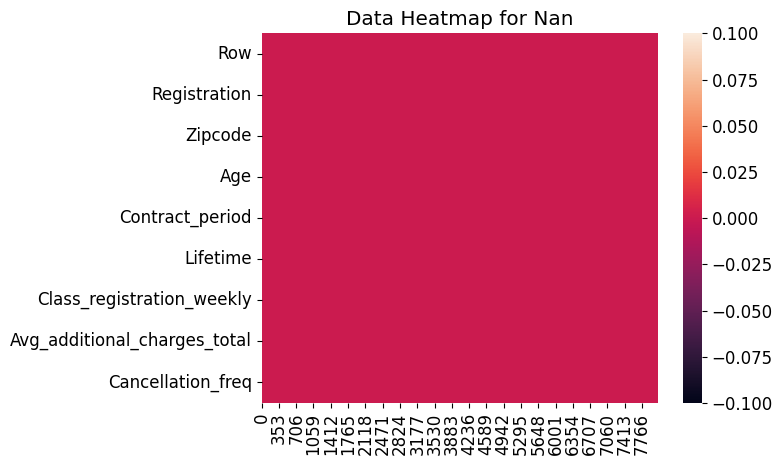

['Partner_company', 'Friend_promo']


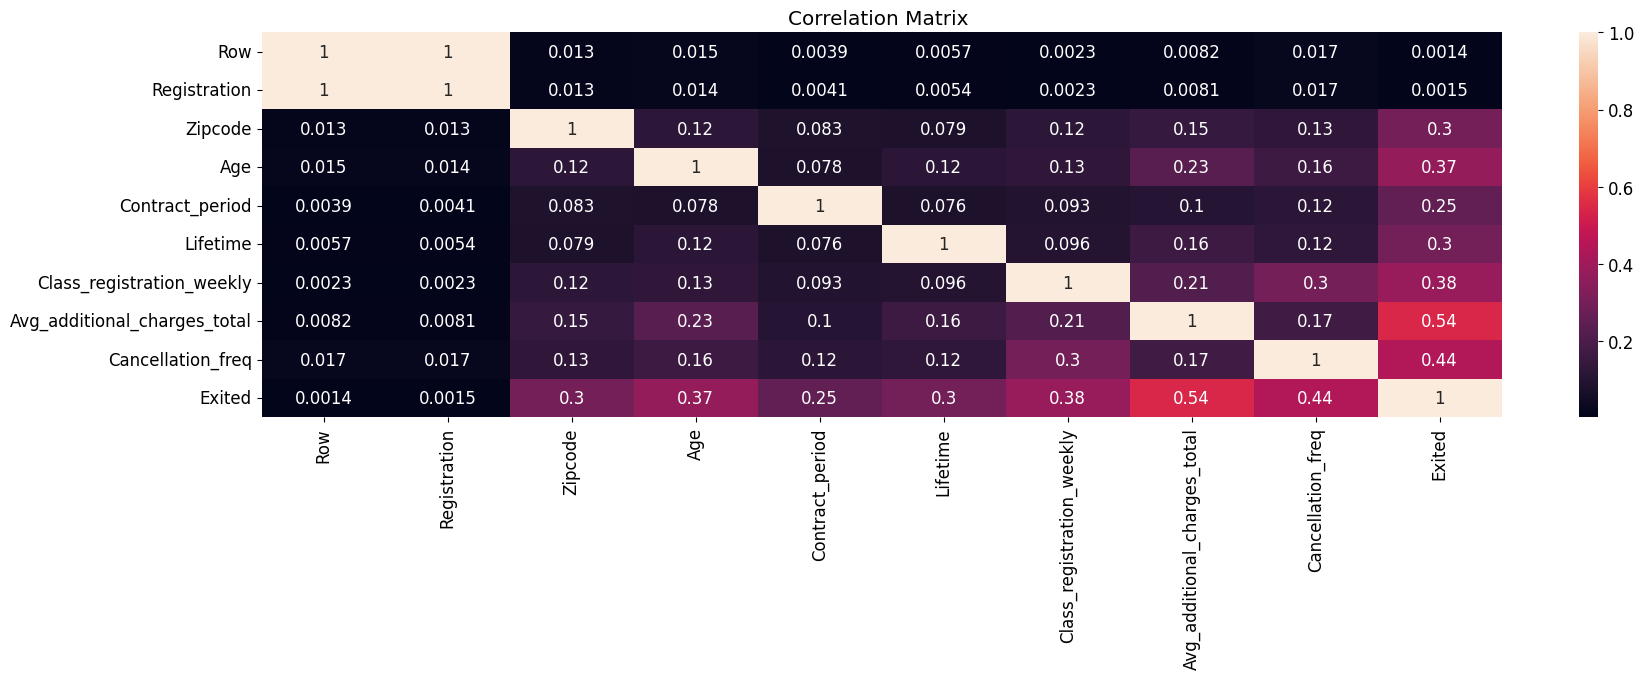

In [77]:
X = train_data.drop(catg_feat, axis=1)
y = train_data['Exited']
print(X.shape,y.shape)
X=X.dropna(axis=1)

vals = y.value_counts()

print(vals.index,vals)

plt.figure(figsize=(8,6))
plt.rc('font', size=12)

ax = vals.plot.bar(rot=0, color='#4B4E6D')
plt.title("Customer Cancelation")
plt.show()

for i in range(len(vals)):
    print(i)
    ax.annotate(vals[i], xy=[vals.index[i], vals[i]], ha='center', va='bottom')

# X=pd.DataFrame(impute_mode.fit_transform(X),columns=X.columns)

print(X.shape,y.shape)
# print(X.describe())

sns.heatmap(X.T.isnull())
plt.title("Data Heatmap for Nan")
plt.show()

print(l)
import numpy as np

df1=train_data.drop(l,axis=1)
plt.figure(figsize = (20,5))
sns.heatmap(np.abs(df1.corr()),annot = True);
plt.title("Correlation Matrix ")
plt.show()

#Classfication models
1.   XGBClassifier
2.   RandomForestClassifier

then visualizing the important features in dataset


Accuracy Score XGB :98.30% 
Prediction: [0 0 0 ... 0 1 0]
Classification Report of XGB
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2448
           1       0.97      0.96      0.97       792

    accuracy                           0.98      3240
   macro avg       0.98      0.98      0.98      3240
weighted avg       0.98      0.98      0.98      3240



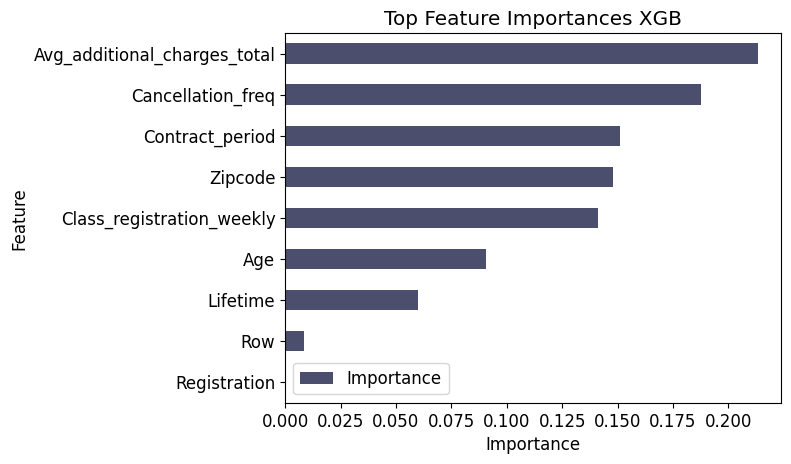

Accuracy Score RFC:96.23% 
Prediction: [0 0 0 ... 1 1 0]
Classification Report RFC 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2448
           1       0.96      0.88      0.92       792

    accuracy                           0.96      3240
   macro avg       0.96      0.94      0.95      3240
weighted avg       0.96      0.96      0.96      3240

 print f1_score RFC 0.920
Index(['Row', 'Registration', 'Zipcode', 'Age', 'Contract_period', 'Lifetime',
       'Class_registration_weekly', 'Avg_additional_charges_total',
       'Cancellation_freq'],
      dtype='object')


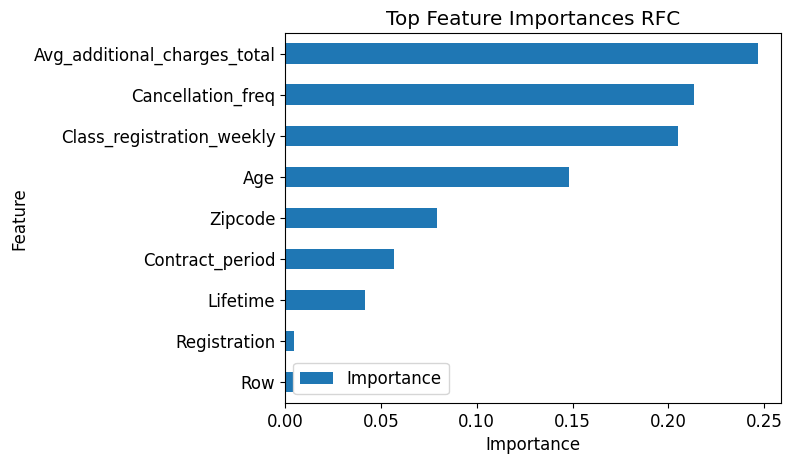

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


# param_grid = {
#     'classifier__n_estimators': [100, 200, 500],
#     'classifier__max_depth': [5, 10, 20, None],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__criterion': ['gini', 'entropy']
#     'classifier__min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1]
# }


def model_XGB(X_train,y_train,X_test,y_test):

    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print("Accuracy XGB: %.2f%%" % (accuracy * 100.0))
    print('Accuracy Score XGB :%.2f%% ' %(model.score(X_test, y_test)*100))
    print('Prediction:', y_pred)
    print("Classification Report of XGB")
    print(classification_report(y_test, y_pred))



    test_data = pd.read_csv('/content/gym_test.csv')
    test_data=test_data.drop(catg_feat , axis=1)


    ###################### Featuer Selection ##############################
    # Features selected by XGBoost
    keys = list(model.get_booster().feature_names)
    values = list(model.feature_importances_)
    data = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False)
    # Top 24 features
    xgbfs_ = data[:24]
    # Plot feature score
    xgbfs_.sort_values(by='Importance').plot(kind='barh', color='#4B4E6D')
    plt.title("Top Feature Importances XGB")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

# model_XGB(X_train,y_train,X_test,y_test)
model_XGB(X_train,y_train,X_val,y_val)


def model_RFC(X_train,y_train,X_test,y_test):

    # scaler = StandardScaler()
    # X_train_ = scaler.fit_transform(X_train)
    # X_test_ = scaler.transform(X_test)

    X_train_ =X_train
    X_test_ = X_test
    # , class_weight='balanced

    model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=6, random_state=42)
    model.fit(X_train_,y_train)
    y_pred=model.predict(X_test_)

    print('Accuracy Score RFC:%.2f%% ' % (model.score(X_test_, y_test)*100))
    print('Prediction:', y_pred)
    print("Classification Report RFC ")
    print(classification_report(y_test, y_pred))

    print(" print f1_score RFC {:.3f}".format(f1_score(y_val,y_pred)))

    test_data = pd.read_csv('/content/gym_test.csv')


    test_data=test_data.drop(catg_feat, axis=1)

      ###################### Featuer Selection ##############################
    feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Importance'])
    top_24 = feature_importances.sort_values(by='Importance', ascending=False).iloc[:24]
    top_24.sort_values(by='Importance').plot(kind="barh")
    plt.title("Top Feature Importances RFC")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


model_RFC(X_train,y_train,X_val,y_val)









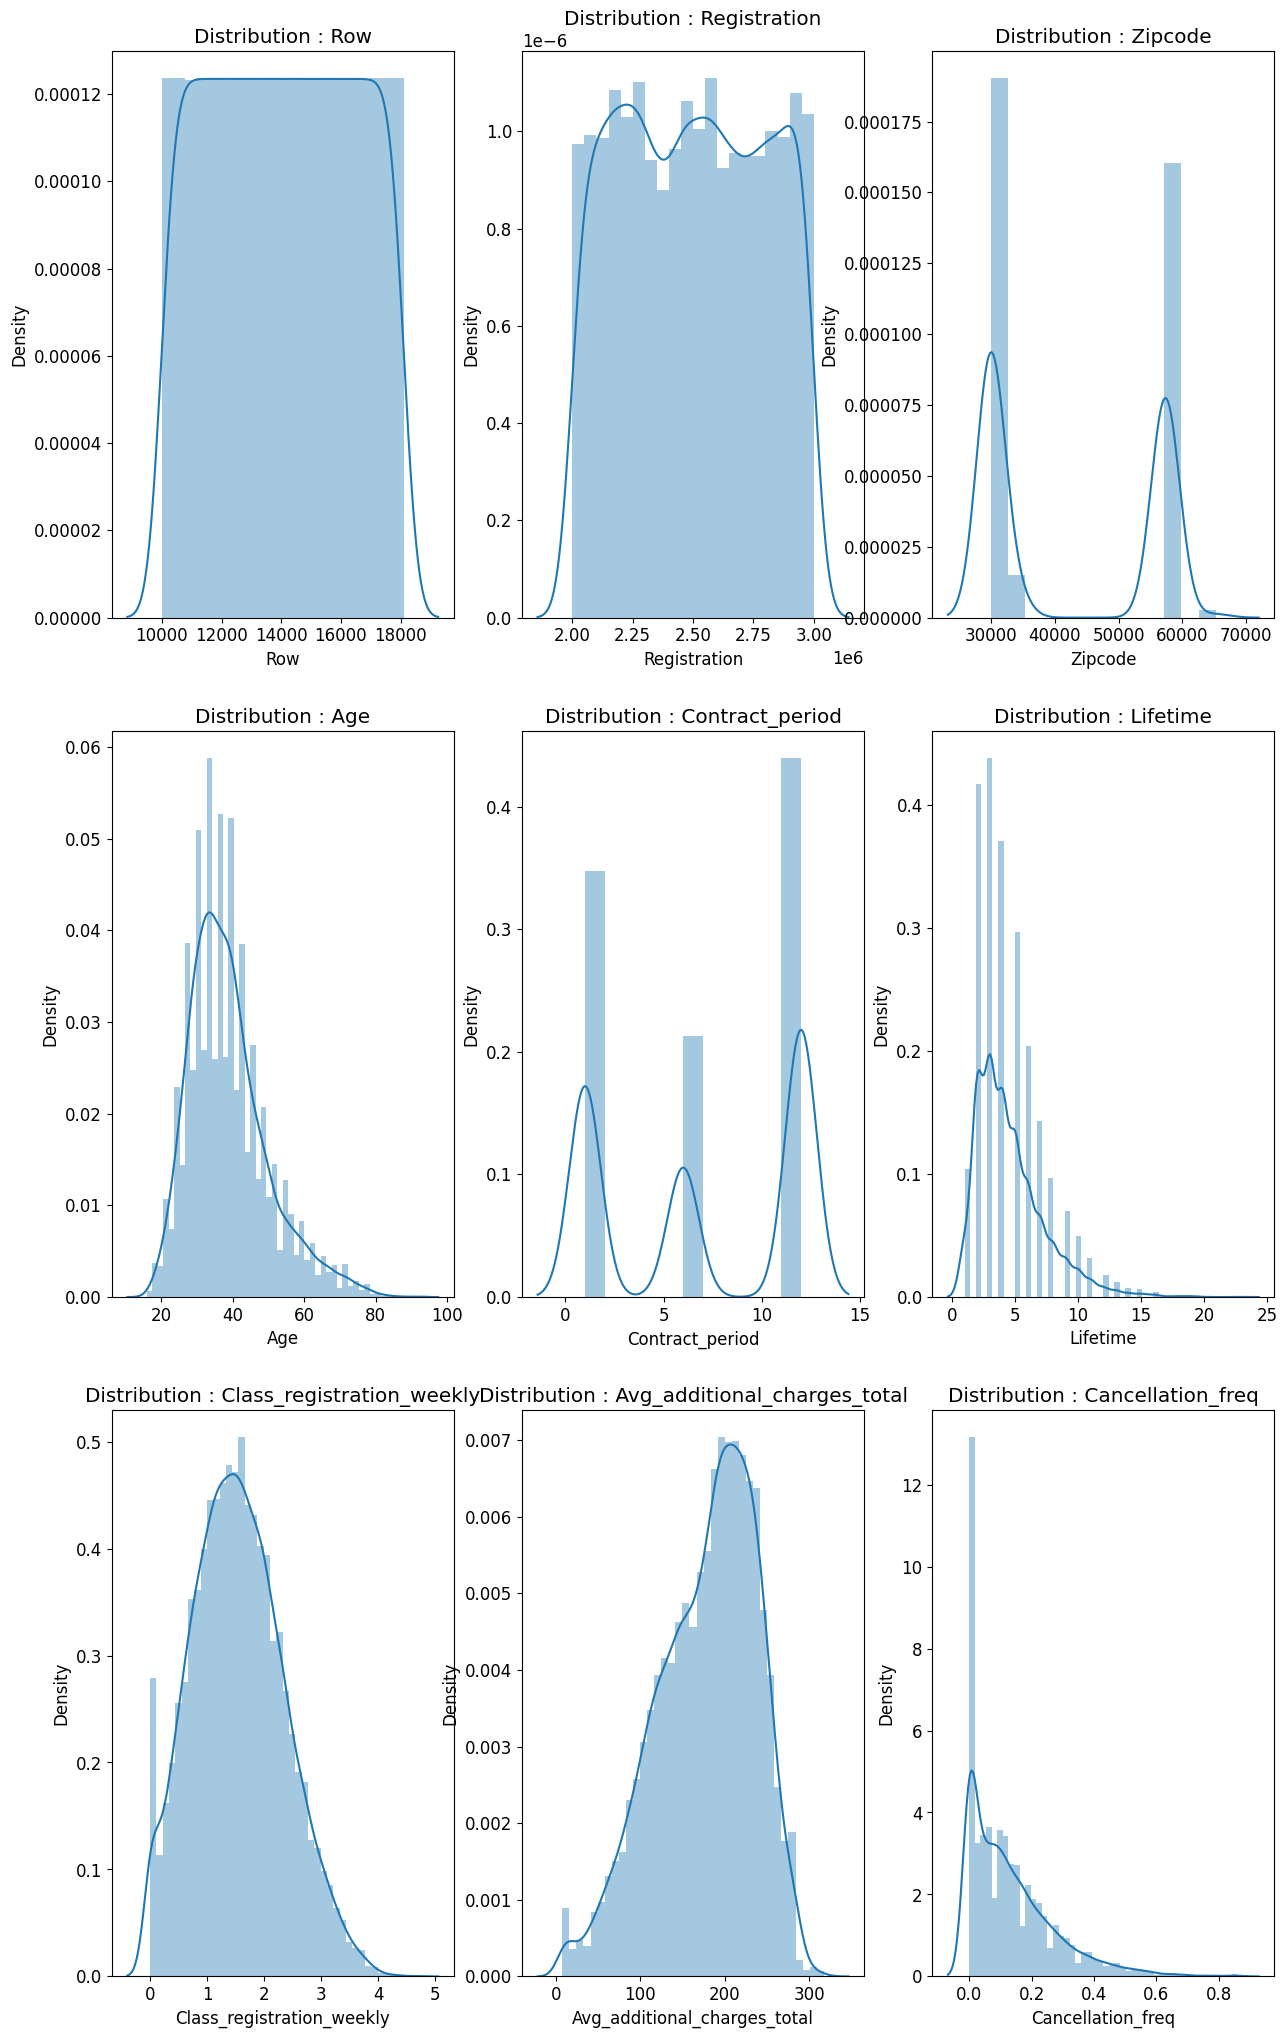

In [83]:
import warnings
warnings.filterwarnings('ignore')

fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,25))
for i in range(len(num_feat)):
  plt.subplot(3,3,i+1)
  sns.distplot(train_data[num_feat[i]])
  title="Distribution : " +num_feat[i]
  plt.title(title)

plt.show()



#Discussing the Distribution visalization of feature
The analysis of feature distribution revealed that "ROW" and "Registration" features are not normally distributed and mostly consist of id values. These two features have no significant impact on the training process and are considered meaningless. This observation was made by visualizing the plot distribution and confirmed by using XGboosting and random forest classifier models to calculate feature importance, where the importance of these two features was almost equal to zero.

On the other hand, other features such as "Avg_additional_charges_total", "Cancellation_freq", "Class_registration_weekly", "Age", "Contract_period", and "Lifetime" are normally distributed and have a strong correlation with the "Exited" output. The results of the classification model confirmed that the decision of a client to cancel their membership in the fitness club is related to these features, and the prediction can be made based on the mentioned features.

    
   

7


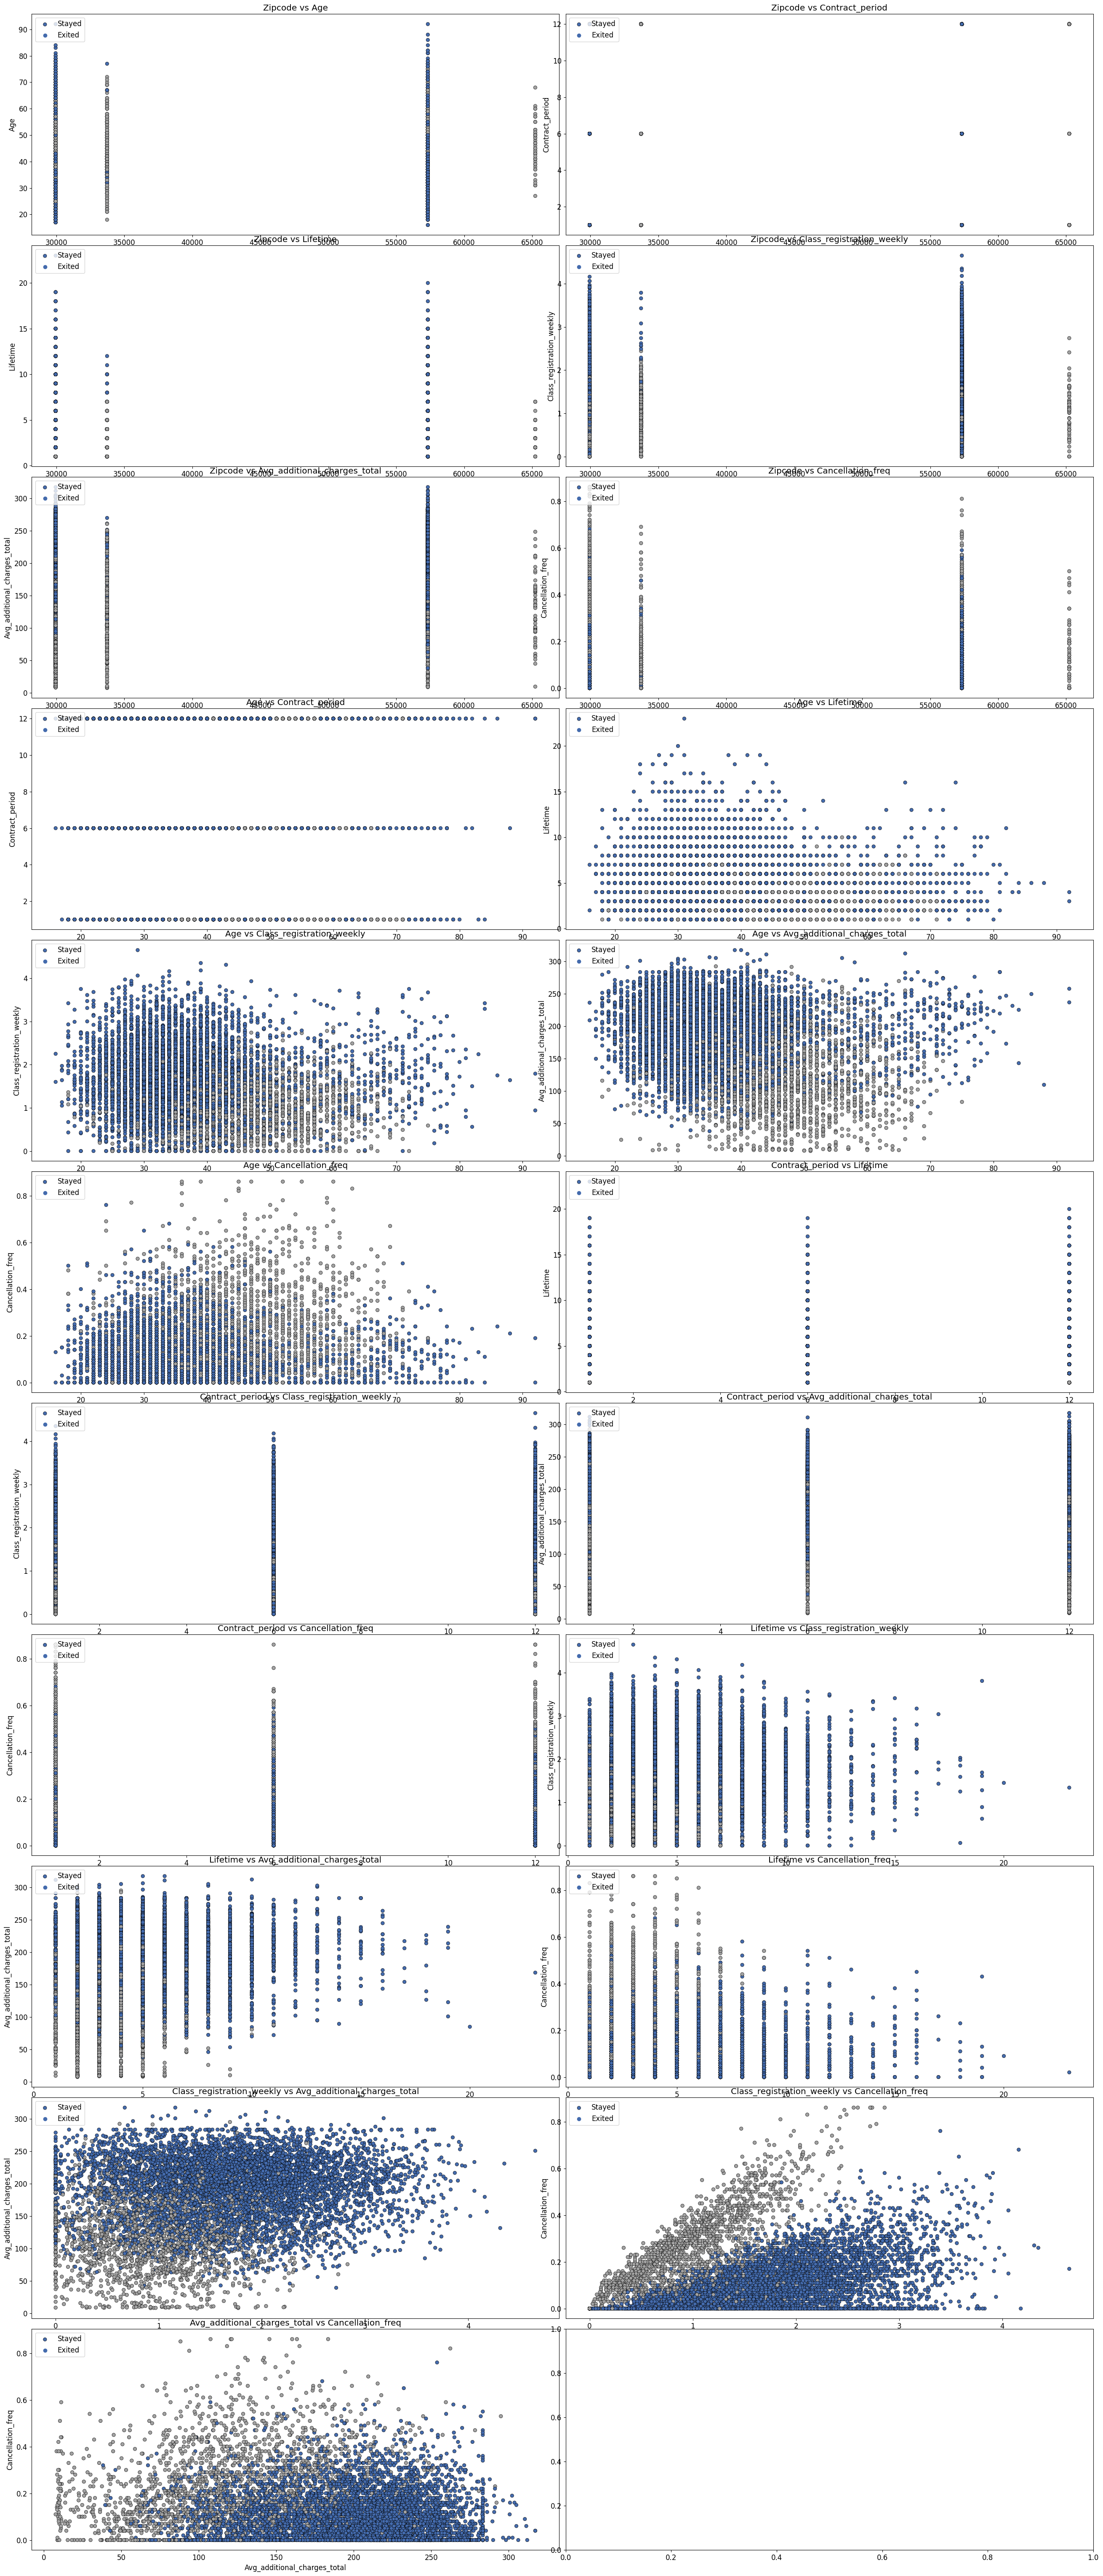

In [85]:
num_feat.remove("Row")
num_feat.remove('Registration')
print(len(num_feat))
colors = ['#446BAD','#A2A2A2']

a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,60))
for i in range(len(num_feat)):
    for j in range(len(num_feat)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = num_feat[i],y = num_feat[j], data = train_data,hue = 'Exited',palette = colors,edgecolor = 'black');
            plt.legend(['Stayed','Exited'],loc = 'upper left',)
            title = num_feat[i] + ' vs ' + num_feat[j]
            plt.title(title)
fig.tight_layout(pad=-3)
